Some code to test the DMP with analytical solution and numerical solution

In [1]:
from data_loader import DataLoader
from dmp import CanonicalSystem, SingleDMP, TrainSingleDMP, TrainDMPs
import matplotlib.pyplot as plt

Load data

In [2]:
# load the data
data_file = "2.npz"
traj_loader = DataLoader(run_time=1.0, dt=0.01, dof=2)
traj_loader.load_data(data_file)
path = traj_loader.paths[0]
x_path = path[:, 0]
y_path = path[:, 1]

In [3]:
cs = CanonicalSystem(dt=0.01)
dmp1 = SingleDMP(n_bfs=100, cs=cs, device='cpu')
dmp2 = SingleDMP(n_bfs=100, cs=cs, device='cpu')
dmp1.imitate_path(x_path)
dmp2.imitate_path(y_path)

In [4]:
import torch
x_target_force = dmp1.gen_target_force(torch.from_numpy(x_path))
y_target_force = dmp2.gen_target_force(torch.from_numpy(y_path))
x_gen_force = dmp1.gen_force()
y_gen_force = dmp2.gen_force()

Plot the basis function

Text(0.5, 1.0, 'DMP system - basis function')

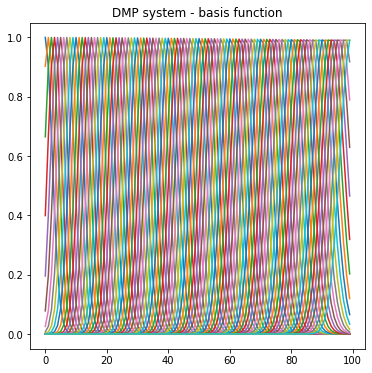

In [5]:
x_c = cs.rollout()
basic = dmp1.gen_psi(x_c)
plt.figure(1, figsize=(6, 6))
plt.plot(basic.numpy())
plt.title("DMP system - basis function")

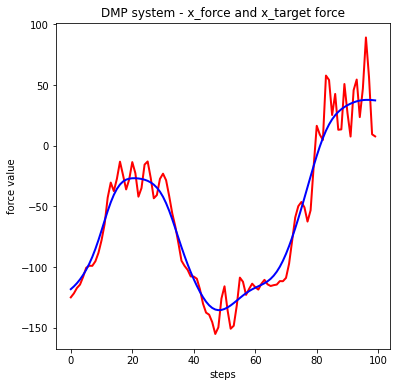

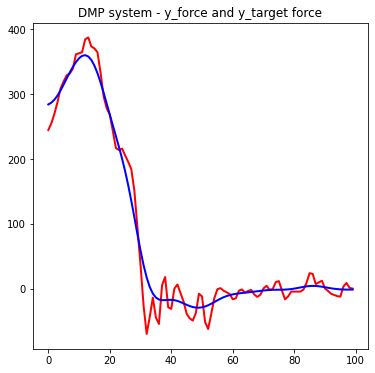

In [6]:
plt.figure(1, figsize=(6, 6))
plt.plot(x_target_force.numpy(), "r", lw=2)
plt.plot(x_gen_force.numpy(), "b", lw=2)
plt.title("DMP system - x_force and x_target force")
plt.xlabel('steps')
plt.ylabel('force value')
plt.show()

plt.figure(1, figsize=(6, 6))
plt.plot(y_target_force.numpy(), "r", lw=2)
plt.plot(y_gen_force.numpy(), "b", lw=2)
plt.title("DMP system - y_force and y_target force")
plt.show()

In [7]:
# rollout the DMP to check the results
x1, _, _ = dmp1.rollout(y0=x_path[0], goal=x_path[-1])
y1, _, _ = dmp2.rollout(y0=y_path[0], goal=y_path[-1])

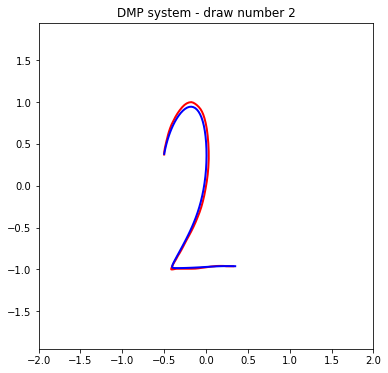

In [8]:
plt.figure(1, figsize=(6, 6))
plt.plot(x_path, y_path, "r", lw=2)
plt.plot(x1, y1, "b", lw=2)
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [9]:
x_dmp_train = TrainSingleDMP(n_bfs=10, cs=cs, device='cpu')
optimizer1 = torch.optim.SGD(x_dmp_train.parameters(), lr=0.1)
x_dmp_train.train_dmp(optimizer=optimizer1, path=x_path, epoch=2000)

y_dmp_train = TrainSingleDMP(n_bfs=10, cs=cs, device='cpu')
optimizer2 = torch.optim.SGD(y_dmp_train.parameters(), lr=0.1)
y_dmp_train.train_dmp(optimizer=optimizer2, path=y_path, epoch=2000)

epoch: 199, loss: 2660.9810757057858
epoch: 399, loss: 1492.4442892520938
epoch: 599, loss: 877.0018599697296
epoch: 799, loss: 594.230741685192
epoch: 999, loss: 468.0420539717259
epoch: 1199, loss: 404.93109571573217
epoch: 1399, loss: 368.2460062263679
epoch: 1599, loss: 344.2415321356438
epoch: 1799, loss: 327.26997338746884
epoch: 1999, loss: 314.6497963164777
epoch: 199, loss: 937.4566544985312
epoch: 399, loss: 529.6806897857905
epoch: 599, loss: 481.6436272422204
epoch: 799, loss: 468.2161858714423
epoch: 999, loss: 458.98598536413164
epoch: 1199, loss: 451.13969107430137
epoch: 1399, loss: 444.1359082160095
epoch: 1599, loss: 437.77086988758475
epoch: 1799, loss: 431.944240485389
epoch: 1999, loss: 426.59533118618333


In [10]:
for name, param in x_dmp_train.named_parameters():
    if param.requires_grad:
        print(name, param.size())

w torch.Size([10])
h torch.Size([10])


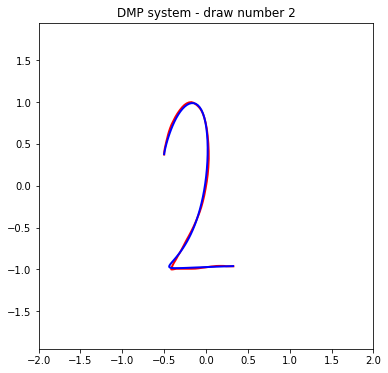

In [12]:
# rollout the DMP to check the results
x, _, _ = x_dmp_train.rollout(y0=x_path[0], goal=x_path[-1])
y, _, _ = y_dmp_train.rollout(y0=y_path[0], goal=y_path[-1])

plt.figure(1, figsize=(6, 6))
plt.plot(x_path, y_path, "r", lw=2)
plt.plot(x, y, "b", lw=2)
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [13]:
x_target_force = x_dmp_train.gen_target_force(torch.from_numpy(x_path))
y_target_force = y_dmp_train.gen_target_force(torch.from_numpy(y_path))
x_gen_force = x_dmp_train.gen_force()
y_gen_force = y_dmp_train.gen_force()

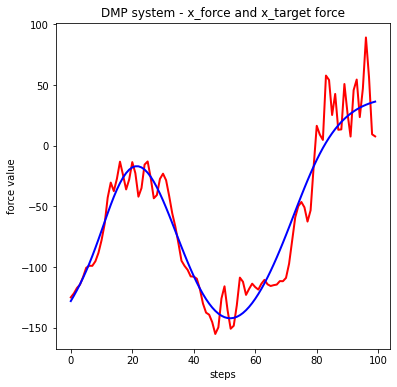

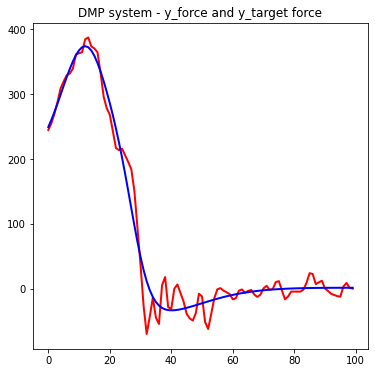

In [14]:
plt.figure(1, figsize=(6, 6))
plt.plot(x_target_force.detach().numpy(), "r", lw=2)
plt.plot(x_gen_force.detach().numpy(), "b", lw=2)
plt.title("DMP system - x_force and x_target force")
plt.xlabel('steps')
plt.ylabel('force value')
plt.show()

plt.figure(1, figsize=(6, 6))
plt.plot(y_target_force.detach().numpy(), "r", lw=2)
plt.plot(y_gen_force.detach().numpy(), "b", lw=2)
plt.title("DMP system - y_force and y_target force")
plt.show()

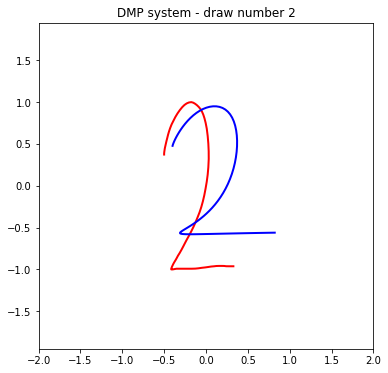

In [16]:
# rollout the DMP to check the results
x, _, _ = x_dmp_train.rollout(y0=x_path[0]+0.1, goal=x_path[-1]+0.5)
y, _, _ = y_dmp_train.rollout(y0=y_path[0]+0.1, goal=y_path[-1]+0.4)

plt.figure(1, figsize=(6, 6))
plt.plot(x_path, y_path, "r", lw=2)
plt.plot(x, y, "b", lw=2)
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [17]:
dmps = TrainDMPs(n_dof=2, n_bfs=30)
print(dmps)
for name, param in dmps.named_parameters():
    if param.requires_grad:
        print(name, param.size())

TrainDMPs(
  (DMPs): ModuleList(
    (0): TrainSingleDMP()
    (1): TrainSingleDMP()
  )
)
DMPs.0.w torch.Size([30])
DMPs.0.h torch.Size([30])
DMPs.1.w torch.Size([30])
DMPs.1.h torch.Size([30])


In [18]:
optimizer = torch.optim.SGD(dmps.parameters(), lr=0.1)
dmps.dmps_train(optimizer=optimizer, path=path, epoch=2000)

epoch: 199, loss: 5703.89501953125
epoch: 399, loss: 3054.7568359375
epoch: 599, loss: 2084.39990234375
epoch: 799, loss: 1576.1240234375
epoch: 999, loss: 1283.331298828125
epoch: 1199, loss: 1104.708984375
epoch: 1399, loss: 990.603515625
epoch: 1599, loss: 914.495361328125
epoch: 1799, loss: 861.4927978515625
epoch: 1999, loss: 822.963623046875


In [22]:
y0 = path[0,:]
goal = path[-1,:]
new_path, _, _ = dmps.rollout(y0=y0, goal=goal)

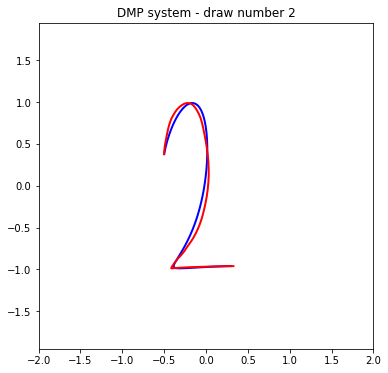

In [25]:
new_path.shape
plt.figure(1, figsize=(6, 6))
plt.plot(new_path[:,0], new_path[:,1], "b", lw=2)
plt.plot(path[:,0], new_path[:,1], "r", lw=2)
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()